In [26]:
# Required imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

# import requisite libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import tensorflow as tf

from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.applications import EfficientNetB0

from mpl_toolkits.mplot3d import Axes3D



In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Capstone/


/content/drive/MyDrive/Capstone


In [25]:
# Define the architecture
model_layerDeep_1 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Now you can load weights
model_layerDeep_1.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_1.h5')

# Get weights of the model
model_layerDeep_1_weights = model_layerDeep_1.get_weights()




In [32]:
for i, layer in enumerate(model_layerDeep_1.layers):
    if len(layer.get_weights()) > 0:
        weights = layer.get_weights()[0]  # weights
        biases = layer.get_weights()[1]  # biases
        print(f"Layer {i+1} weights shape: {weights.shape}")
        print(f"Layer {i+1} biases shape: {biases.shape}")
    else:
        print(f"Layer {i+1} does not have weights or biases")


Layer 1 weights shape: (3, 3, 3, 2)
Layer 1 biases shape: (2,)
Layer 2 does not have weights or biases
Layer 3 weights shape: (3, 3, 2, 4)
Layer 3 biases shape: (4,)
Layer 4 does not have weights or biases
Layer 5 weights shape: (3, 3, 4, 8)
Layer 5 biases shape: (8,)
Layer 6 does not have weights or biases
Layer 7 weights shape: (3, 3, 8, 16)
Layer 7 biases shape: (16,)
Layer 8 does not have weights or biases
Layer 9 weights shape: (3, 3, 16, 16)
Layer 9 biases shape: (16,)
Layer 10 does not have weights or biases
Layer 11 weights shape: (3, 3, 16, 32)
Layer 11 biases shape: (32,)
Layer 12 does not have weights or biases
Layer 13 does not have weights or biases
Layer 14 weights shape: (32, 32)
Layer 14 biases shape: (32,)
Layer 15 weights shape: (32, 8)
Layer 15 biases shape: (8,)


Layer 1 weights cannot be reshaped into (-1, 4)
Layer 2 does not have weights or biases


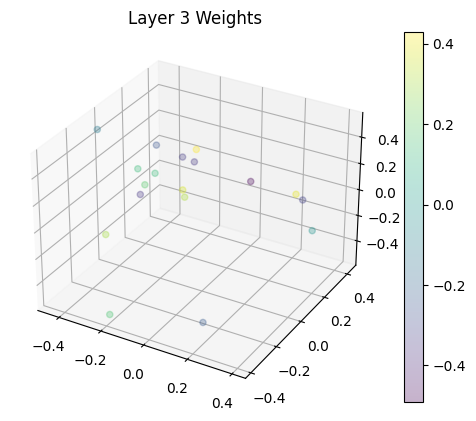

Layer 4 does not have weights or biases


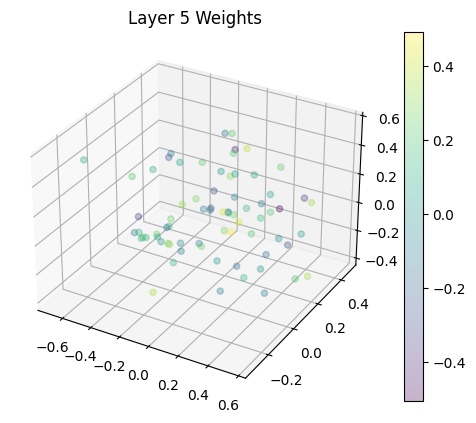

Layer 6 does not have weights or biases


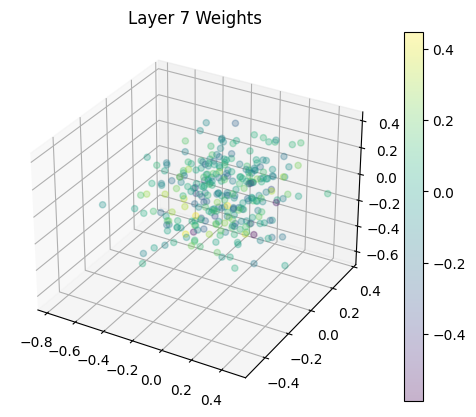

Layer 8 does not have weights or biases


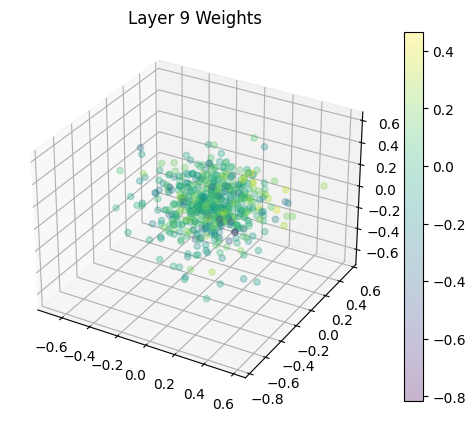

Layer 10 does not have weights or biases


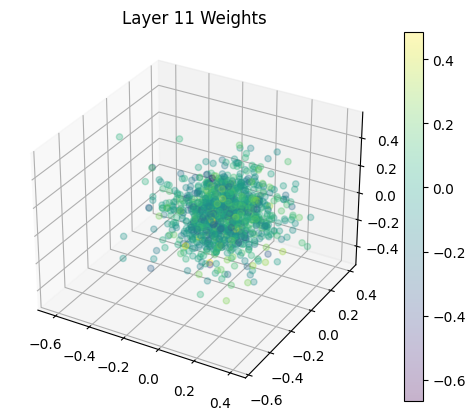

Layer 12 does not have weights or biases
Layer 13 does not have weights or biases
Layer 14 does not have weights or biases
Layer 15 does not have weights or biases
Layer 16 does not have weights or biases


In [37]:
# Iterate over the weights of each layer
for i, layer_weights in enumerate(model_layerDeep_1_weights):
    # Check if the layer weights have 4 dimensions
    if len(layer_weights.shape) == 4:
        # Check if the total number of elements is a multiple of 4
        if np.prod(layer_weights.shape) % 4 == 0:
            # Reshape the weights to have 4 dimensions
            reshaped_weights = layer_weights.reshape(-1, 4)

            # Create a 3D scatter plot
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            # Use the first three dimensions for the x, y, and z coordinates
            x = reshaped_weights[:, 0]
            y = reshaped_weights[:, 1]
            z = reshaped_weights[:, 2]

            # Use the fourth dimension for the color
            colors = reshaped_weights[:, 3]

            # Set opacity with alpha (e.g., alpha=0.5 for semi-transparent)
            sc = ax.scatter(x, y, z, c=colors, alpha=0.3)

            # Add a colorbar
            plt.colorbar(sc)

            plt.title(f'Layer {i+1} Weights')
            plt.show()
        else:
            print(f"Layer {i+1} weights cannot be reshaped into (-1, 4)")
    else:
        print(f"Layer {i+1} does not have weights or biases")


In [38]:
# Define the architecture
model_layerDeep_2 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Now you can load weights
model_layerDeep_2.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_2.h5')

# Get weights of the model
model_layerDeep_2_weights = model_layerDeep_2.get_weights()




Layer 1 weights cannot be reshaped into (-1, 4)
Layer 2 does not have weights or biases


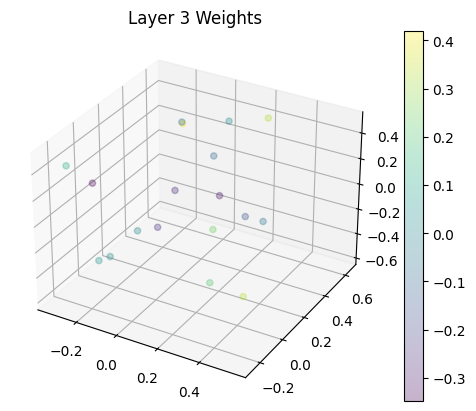

Layer 4 does not have weights or biases


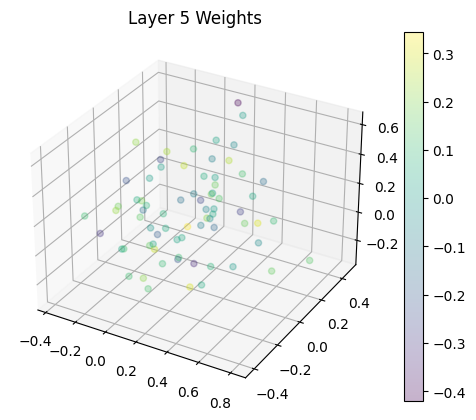

Layer 6 does not have weights or biases


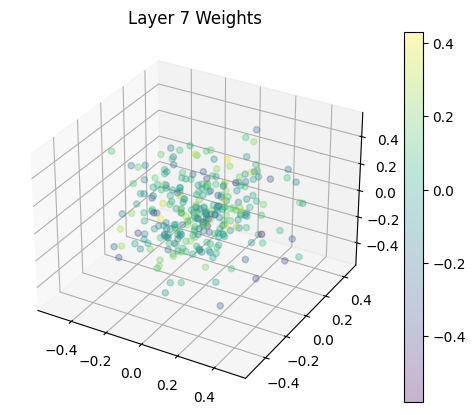

Layer 8 does not have weights or biases


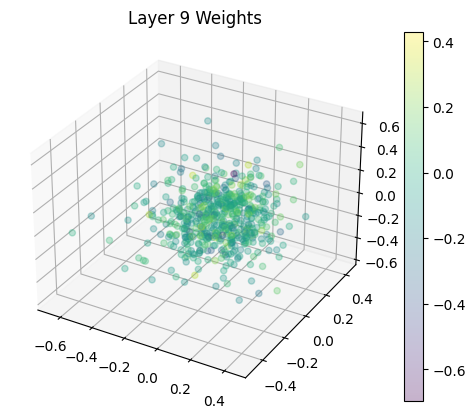

Layer 10 does not have weights or biases
Layer 11 does not have weights or biases
Layer 12 does not have weights or biases
Layer 13 does not have weights or biases
Layer 14 does not have weights or biases


In [40]:
# Iterate over the weights of each layer
for i, layer_weights in enumerate(model_layerDeep_2_weights):
    # Check if the layer weights have 4 dimensions
    if len(layer_weights.shape) == 4:
        # Check if the total number of elements is a multiple of 4
        if np.prod(layer_weights.shape) % 4 == 0:
            # Reshape the weights to have 4 dimensions
            reshaped_weights = layer_weights.reshape(-1, 4)

            # Create a 3D scatter plot
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            # Use the first three dimensions for the x, y, and z coordinates
            x = reshaped_weights[:, 0]
            y = reshaped_weights[:, 1]
            z = reshaped_weights[:, 2]

            # Use the fourth dimension for the color
            colors = reshaped_weights[:, 3]

            # Set opacity with alpha (e.g., alpha=0.5 for semi-transparent)
            sc = ax.scatter(x, y, z, c=colors, alpha=0.3)

            # Add a colorbar
            plt.colorbar(sc)

            plt.title(f'Layer {i+1} Weights')
            plt.show()
        else:
            print(f"Layer {i+1} weights cannot be reshaped into (-1, 4)")
    else:
        print(f"Layer {i+1} does not have weights or biases")


In [41]:
# Define the architecture
model_layerDeep_3 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Now you can load weights
model_layerDeep_3.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_3.h5')

# Get weights of the model
model_layerDeep_3_weights = model_layerDeep_3.get_weights()

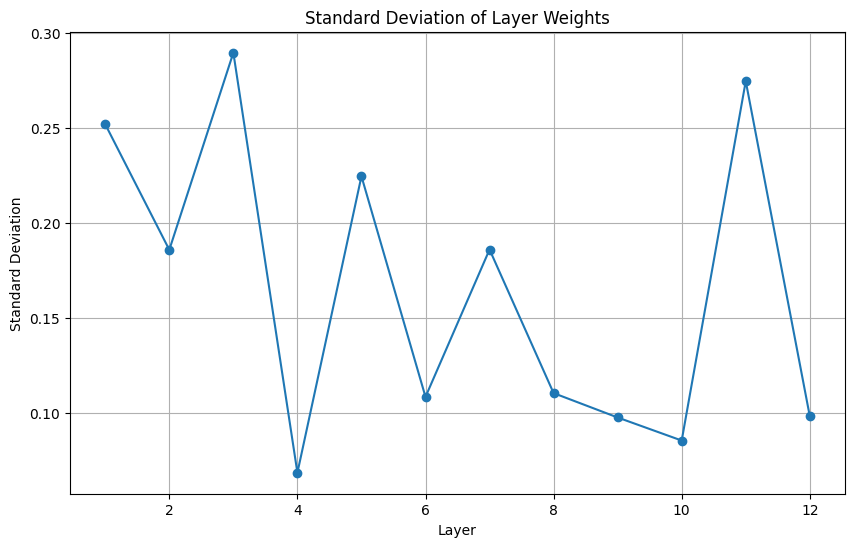

In [64]:
# Get weights of the model
model_layerDeep_3_model_weights = model_layerDeep_3.get_weights()

# Calculate standard deviation for each layer
model_layerDeep_3_std_devs = [np.std(layer_weights) for layer_weights in model_layerDeep_3_model_weights]

# Create a list of layer indices
layers = range(1, len(std_devs) + 1)

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(layers, model_layerDeep_3_std_devs, marker='o')
plt.title('Standard Deviation of Layer Weights')
plt.xlabel('Layer')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()


Layer 1 weights cannot be reshaped into (-1, 4)
Layer 2 does not have weights or biases


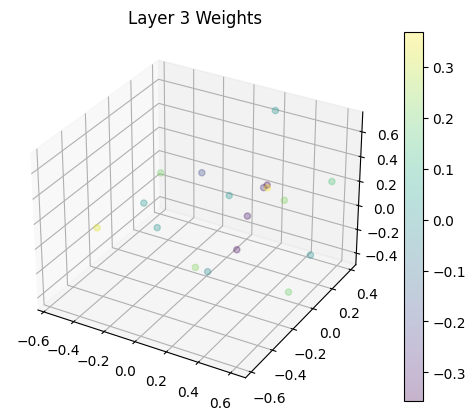

Layer 4 does not have weights or biases


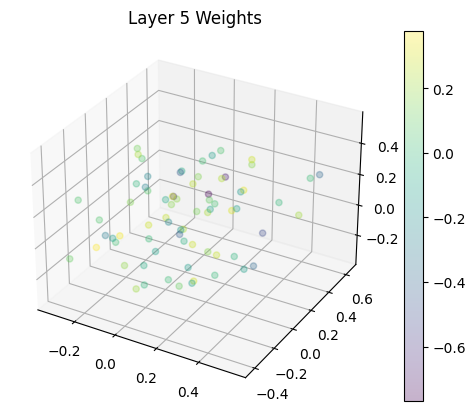

Layer 6 does not have weights or biases


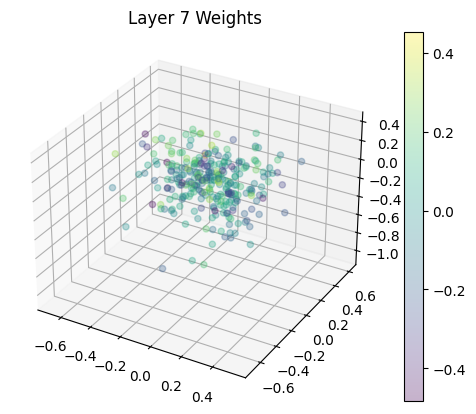

Layer 8 does not have weights or biases
Layer 9 does not have weights or biases
Layer 10 does not have weights or biases
Layer 11 does not have weights or biases
Layer 12 does not have weights or biases


In [42]:
# Iterate over the weights of each layer
for i, layer_weights in enumerate(model_layerDeep_3_weights):
    # Check if the layer weights have 4 dimensions
    if len(layer_weights.shape) == 4:
        # Check if the total number of elements is a multiple of 4
        if np.prod(layer_weights.shape) % 4 == 0:
            # Reshape the weights to have 4 dimensions
            reshaped_weights = layer_weights.reshape(-1, 4)

            # Create a 3D scatter plot
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            # Use the first three dimensions for the x, y, and z coordinates
            x = reshaped_weights[:, 0]
            y = reshaped_weights[:, 1]
            z = reshaped_weights[:, 2]

            # Use the fourth dimension for the color
            colors = reshaped_weights[:, 3]

            # Set opacity with alpha (e.g., alpha=0.5 for semi-transparent)
            sc = ax.scatter(x, y, z, c=colors, alpha=0.3)

            # Add a colorbar
            plt.colorbar(sc)

            plt.title(f'Layer {i+1} Weights')
            plt.show()
        else:
            print(f"Layer {i+1} weights cannot be reshaped into (-1, 4)")
    else:
        print(f"Layer {i+1} does not have weights or biases")


In [43]:
# Define the architecture
model_layerDeep_4 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Now you can load weights
model_layerDeep_4.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_4.h5')

# Get weights of the model
model_layerDeep_4_weights = model_layerDeep_4.get_weights()

Layer 1 weights cannot be reshaped into (-1, 4)
Layer 2 does not have weights or biases


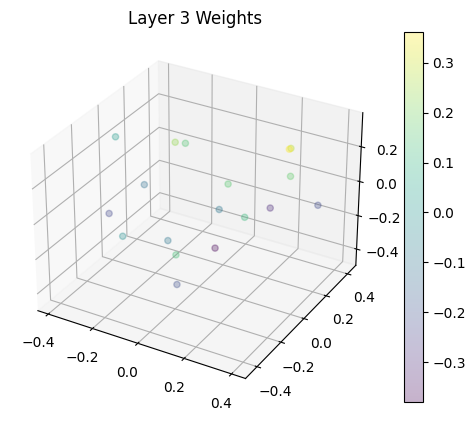

Layer 4 does not have weights or biases


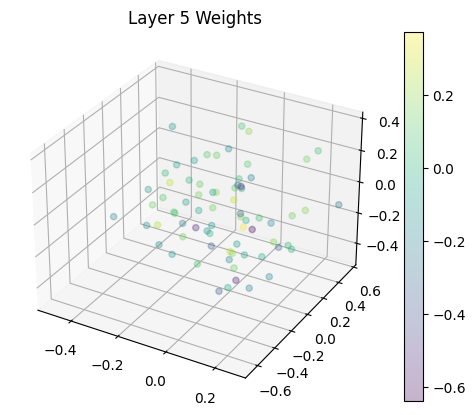

Layer 6 does not have weights or biases
Layer 7 does not have weights or biases
Layer 8 does not have weights or biases
Layer 9 does not have weights or biases
Layer 10 does not have weights or biases


In [44]:
# Iterate over the weights of each layer
for i, layer_weights in enumerate(model_layerDeep_4_weights):
    # Check if the layer weights have 4 dimensions
    if len(layer_weights.shape) == 4:
        # Check if the total number of elements is a multiple of 4
        if np.prod(layer_weights.shape) % 4 == 0:
            # Reshape the weights to have 4 dimensions
            reshaped_weights = layer_weights.reshape(-1, 4)

            # Create a 3D scatter plot
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            # Use the first three dimensions for the x, y, and z coordinates
            x = reshaped_weights[:, 0]
            y = reshaped_weights[:, 1]
            z = reshaped_weights[:, 2]

            # Use the fourth dimension for the color
            colors = reshaped_weights[:, 3]

            # Set opacity with alpha (e.g., alpha=0.5 for semi-transparent)
            sc = ax.scatter(x, y, z, c=colors, alpha=0.3)

            # Add a colorbar
            plt.colorbar(sc)

            plt.title(f'Layer {i+1} Weights')
            plt.show()
        else:
            print(f"Layer {i+1} weights cannot be reshaped into (-1, 4)")
    else:
        print(f"Layer {i+1} does not have weights or biases")


In [46]:
# Define the architecture
model_layerDeep_5 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Now you can load weights
model_layerDeep_5.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_5.h5')

# Get weights of the model
model_layerDeep_5_weights = model_layerDeep_5.get_weights()

Layer 1 weights cannot be reshaped into (-1, 4)
Layer 2 does not have weights or biases


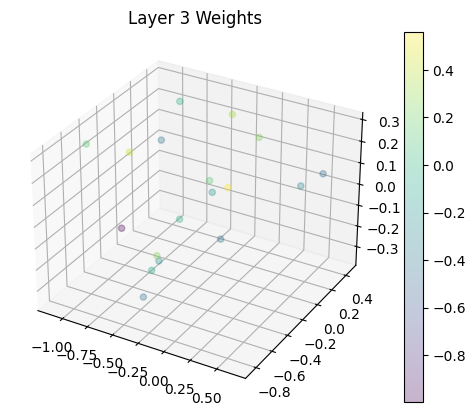

Layer 4 does not have weights or biases
Layer 5 does not have weights or biases
Layer 6 does not have weights or biases
Layer 7 does not have weights or biases
Layer 8 does not have weights or biases


In [47]:
# Iterate over the weights of each layer
for i, layer_weights in enumerate(model_layerDeep_5_weights):
    # Check if the layer weights have 4 dimensions
    if len(layer_weights.shape) == 4:
        # Check if the total number of elements is a multiple of 4
        if np.prod(layer_weights.shape) % 4 == 0:
            # Reshape the weights to have 4 dimensions
            reshaped_weights = layer_weights.reshape(-1, 4)

            # Create a 3D scatter plot
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            # Use the first three dimensions for the x, y, and z coordinates
            x = reshaped_weights[:, 0]
            y = reshaped_weights[:, 1]
            z = reshaped_weights[:, 2]

            # Use the fourth dimension for the color
            colors = reshaped_weights[:, 3]

            # Set opacity with alpha (e.g., alpha=0.5 for semi-transparent)
            sc = ax.scatter(x, y, z, c=colors, alpha=0.3)

            # Add a colorbar
            plt.colorbar(sc)

            plt.title(f'Layer {i+1} Weights')
            plt.show()
        else:
            print(f"Layer {i+1} weights cannot be reshaped into (-1, 4)")
    else:
        print(f"Layer {i+1} does not have weights or biases")


In [50]:
# Define the architecture
model_filterDeep_1 = Sequential([
    Conv2D(128, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Now you can load weights
model_filterDeep_1.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_1.h5')

# Get weights of the model
model_filterDeep_1_weights = model_filterDeep_1.get_weights()

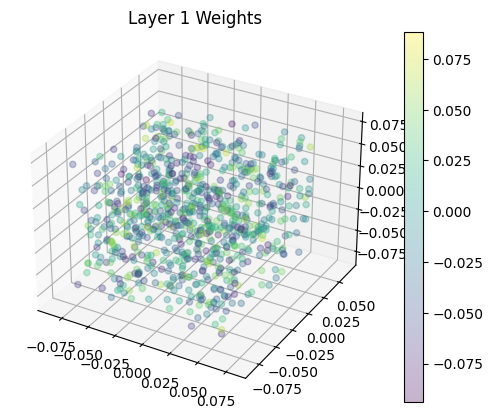

Layer 2 does not have weights or biases
Layer 3 does not have weights or biases
Layer 4 does not have weights or biases
Layer 5 does not have weights or biases
Layer 6 does not have weights or biases


In [51]:
# Iterate over the weights of each layer
for i, layer_weights in enumerate(model_filterDeep_1_weights):
    # Check if the layer weights have 4 dimensions
    if len(layer_weights.shape) == 4:
        # Check if the total number of elements is a multiple of 4
        if np.prod(layer_weights.shape) % 4 == 0:
            # Reshape the weights to have 4 dimensions
            reshaped_weights = layer_weights.reshape(-1, 4)

            # Create a 3D scatter plot
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            # Use the first three dimensions for the x, y, and z coordinates
            x = reshaped_weights[:, 0]
            y = reshaped_weights[:, 1]
            z = reshaped_weights[:, 2]

            # Use the fourth dimension for the color
            colors = reshaped_weights[:, 3]

            # Set opacity with alpha (e.g., alpha=0.5 for semi-transparent)
            sc = ax.scatter(x, y, z, c=colors, alpha=0.3)

            # Add a colorbar
            plt.colorbar(sc)

            plt.title(f'Layer {i+1} Weights')
            plt.show()
        else:
            print(f"Layer {i+1} weights cannot be reshaped into (-1, 4)")
    else:
        print(f"Layer {i+1} does not have weights or biases")


In [52]:
# Define the architecture
model_filterDeep_2 = Sequential([
    Conv2D(128, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Now you can load weights
model_filterDeep_2.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_2.h5')

# Get weights of the model
model_filterDeep_2_weights = model_filterDeep_2.get_weights()

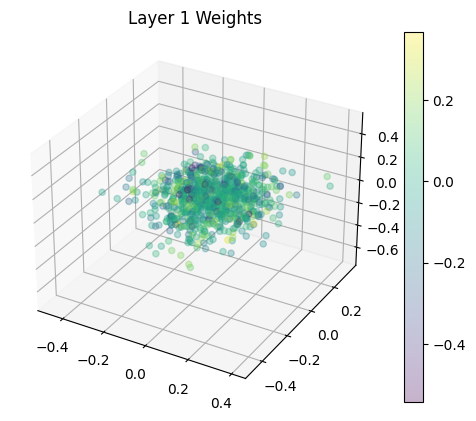

Layer 2 does not have weights or biases


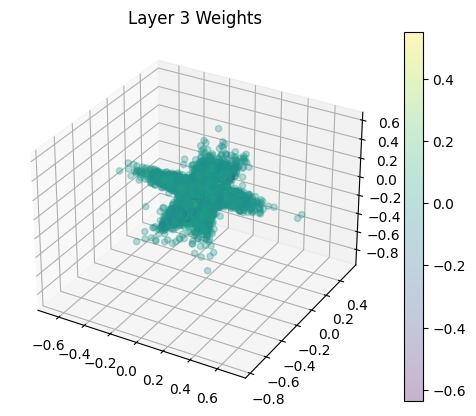

Layer 4 does not have weights or biases
Layer 5 does not have weights or biases
Layer 6 does not have weights or biases
Layer 7 does not have weights or biases
Layer 8 does not have weights or biases


In [55]:
# Iterate over the weights of each layer
for i, layer_weights in enumerate(model_filterDeep_2_weights):
    # Check if the layer weights have 4 dimensions
    if len(layer_weights.shape) == 4:
        # Check if the total number of elements is a multiple of 4
        if np.prod(layer_weights.shape) % 4 == 0:
            # Reshape the weights to have 4 dimensions
            reshaped_weights = layer_weights.reshape(-1, 4)

            # Create a 3D scatter plot
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            # Use the first three dimensions for the x, y, and z coordinates
            x = reshaped_weights[:, 0]
            y = reshaped_weights[:, 1]
            z = reshaped_weights[:, 2]

            # Use the fourth dimension for the color
            colors = reshaped_weights[:, 3]

            # Set opacity with alpha (e.g., alpha=0.5 for semi-transparent)
            sc = ax.scatter(x, y, z, c=colors, alpha=0.3)

            # Add a colorbar
            plt.colorbar(sc)

            plt.title(f'Layer {i+1} Weights')
            plt.show()
        else:
            print(f"Layer {i+1} weights cannot be reshaped into (-1, 4)")
    else:
        print(f"Layer {i+1} does not have weights or biases")


In [56]:
# Define the architecture
model_filterDeep_3 = Sequential([
    Conv2D(64, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Now you can load weights
model_filterDeep_3.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_3.h5')

# Get weights of the model
model_filterDeep_3_weights = model_filterDeep_3.get_weights()

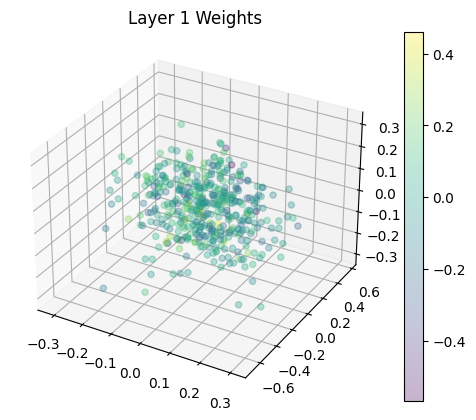

Layer 2 does not have weights or biases


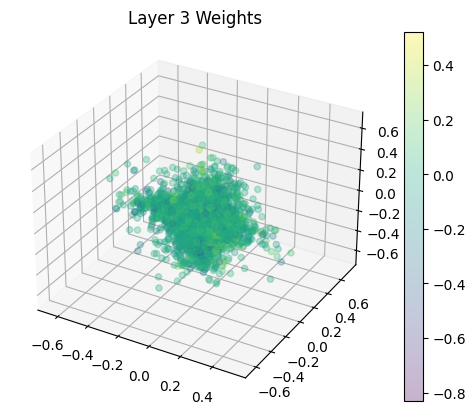

Layer 4 does not have weights or biases
Layer 5 does not have weights or biases
Layer 6 does not have weights or biases
Layer 7 does not have weights or biases
Layer 8 does not have weights or biases


In [57]:
# Iterate over the weights of each layer
for i, layer_weights in enumerate(model_filterDeep_3_weights):
    # Check if the layer weights have 4 dimensions
    if len(layer_weights.shape) == 4:
        # Check if the total number of elements is a multiple of 4
        if np.prod(layer_weights.shape) % 4 == 0:
            # Reshape the weights to have 4 dimensions
            reshaped_weights = layer_weights.reshape(-1, 4)

            # Create a 3D scatter plot
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            # Use the first three dimensions for the x, y, and z coordinates
            x = reshaped_weights[:, 0]
            y = reshaped_weights[:, 1]
            z = reshaped_weights[:, 2]

            # Use the fourth dimension for the color
            colors = reshaped_weights[:, 3]

            # Set opacity with alpha (e.g., alpha=0.5 for semi-transparent)
            sc = ax.scatter(x, y, z, c=colors, alpha=0.3)

            # Add a colorbar
            plt.colorbar(sc)

            plt.title(f'Layer {i+1} Weights')
            plt.show()
        else:
            print(f"Layer {i+1} weights cannot be reshaped into (-1, 4)")
    else:
        print(f"Layer {i+1} does not have weights or biases")


In [58]:
# Define the architecture
model_filterDeep_4 = Sequential([
    Conv2D(16, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Now you can load weights
model_filterDeep_4.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_4.h5')

# Get weights of the model
model_filterDeep_4_weights = model_filterDeep_4.get_weights()


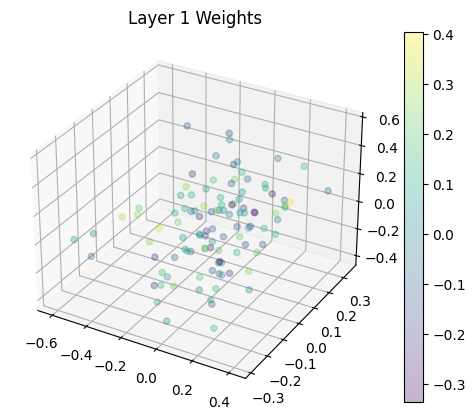

Layer 2 does not have weights or biases


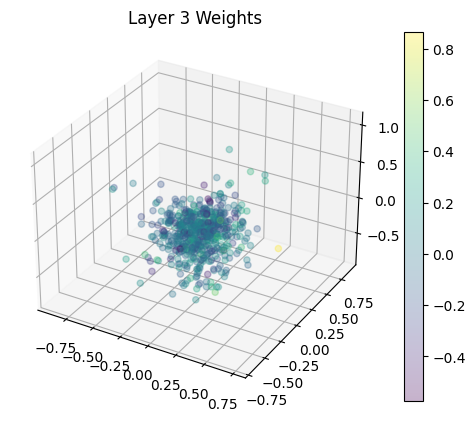

Layer 4 does not have weights or biases
Layer 5 does not have weights or biases
Layer 6 does not have weights or biases
Layer 7 does not have weights or biases
Layer 8 does not have weights or biases


In [59]:
# Iterate over the weights of each layer
for i, layer_weights in enumerate(model_filterDeep_4_weights):
    # Check if the layer weights have 4 dimensions
    if len(layer_weights.shape) == 4:
        # Check if the total number of elements is a multiple of 4
        if np.prod(layer_weights.shape) % 4 == 0:
            # Reshape the weights to have 4 dimensions
            reshaped_weights = layer_weights.reshape(-1, 4)

            # Create a 3D scatter plot
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            # Use the first three dimensions for the x, y, and z coordinates
            x = reshaped_weights[:, 0]
            y = reshaped_weights[:, 1]
            z = reshaped_weights[:, 2]

            # Use the fourth dimension for the color
            colors = reshaped_weights[:, 3]

            # Set opacity with alpha (e.g., alpha=0.5 for semi-transparent)
            sc = ax.scatter(x, y, z, c=colors, alpha=0.3)

            # Add a colorbar
            plt.colorbar(sc)

            plt.title(f'Layer {i+1} Weights')
            plt.show()
        else:
            print(f"Layer {i+1} weights cannot be reshaped into (-1, 4)")
    else:
        print(f"Layer {i+1} does not have weights or biases")


In [60]:
# Define the architecture
model_filterDeep_5 = Sequential([
    Conv2D(4, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Now you can load weights
model_filterDeep_5.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_5.h5')

# Get weights of the model
model_filterDeep_5_weights = model_filterDeep_5.get_weights()

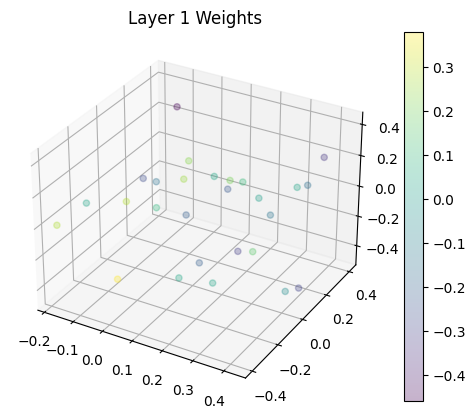

Layer 2 does not have weights or biases


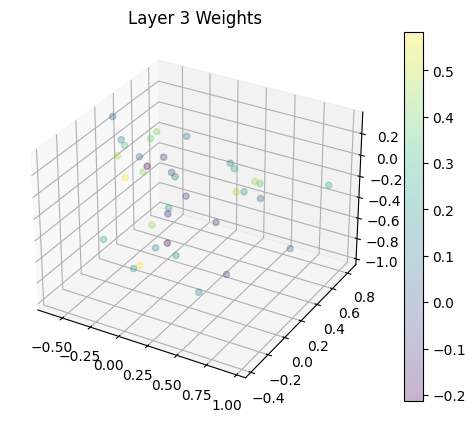

Layer 4 does not have weights or biases
Layer 5 does not have weights or biases
Layer 6 does not have weights or biases
Layer 7 does not have weights or biases
Layer 8 does not have weights or biases


In [61]:
# Iterate over the weights of each layer
for i, layer_weights in enumerate(model_filterDeep_5_weights):
    # Check if the layer weights have 4 dimensions
    if len(layer_weights.shape) == 4:
        # Check if the total number of elements is a multiple of 4
        if np.prod(layer_weights.shape) % 4 == 0:
            # Reshape the weights to have 4 dimensions
            reshaped_weights = layer_weights.reshape(-1, 4)

            # Create a 3D scatter plot
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            # Use the first three dimensions for the x, y, and z coordinates
            x = reshaped_weights[:, 0]
            y = reshaped_weights[:, 1]
            z = reshaped_weights[:, 2]

            # Use the fourth dimension for the color
            colors = reshaped_weights[:, 3]

            # Set opacity with alpha (e.g., alpha=0.5 for semi-transparent)
            sc = ax.scatter(x, y, z, c=colors, alpha=0.3)

            # Add a colorbar
            plt.colorbar(sc)

            plt.title(f'Layer {i+1} Weights')
            plt.show()
        else:
            print(f"Layer {i+1} weights cannot be reshaped into (-1, 4)")
    else:
        print(f"Layer {i+1} does not have weights or biases")
